In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from glob import glob
import warnings;warnings.filterwarnings(action="ignore")
import missingno
#warnings.simplefilter(action="ignore", category='all')
import time

In [2]:
#need this to print full rows and columns
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
df = pd.read_csv("model_data.csv")

In [4]:
#check dataset description
df.describe(include = 'all')

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE
count,70889,7.088900e+04,70889,70889.000000,70889.000000,70889.000000,70889
unique,98,NaN,2623,NaN,NaN,NaN,4
top,Lekki,NaN,2019-12-25,NaN,NaN,NaN,FLAT
freq,11283,NaN,1896,NaN,NaN,NaN,52082
mean,NaN,2.323874e+06,NaN,2.614298,2.668707,3.126917,NaN
std,NaN,2.977676e+06,NaN,1.185116,1.241712,1.433735,NaN
min,NaN,1.000000e+05,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,6.000000e+05,NaN,2.000000,2.000000,2.000000,NaN
50%,NaN,1.200000e+06,NaN,3.000000,3.000000,3.000000,NaN
75%,NaN,3.000000e+06,NaN,3.000000,3.000000,4.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70889 entries, 0 to 70888
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    70889 non-null  object 
 1   PRICE       70889 non-null  float64
 2   DATE ADDED  70889 non-null  object 
 3   BEDROOMS    70889 non-null  int64  
 4   BATHROOMS   70889 non-null  int64  
 5   TOILETS     70889 non-null  int64  
 6   HOUSE_TYPE  70889 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.8+ MB


In [6]:
df.shape

(70889, 7)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(70850, 7)

In [9]:
df.sample()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE
48147,Ogba,500000.0,2022-04-01,1,2,2,FLAT


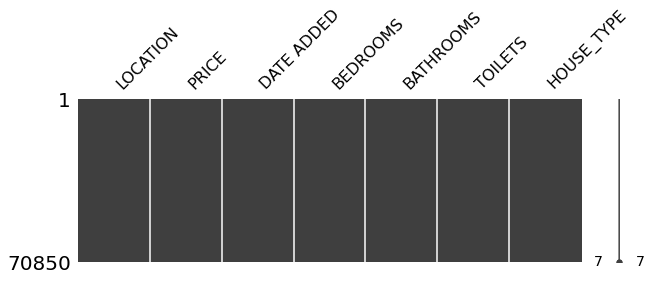

In [10]:
#check for missing values
missingno.matrix(df,figsize = (10,3));

In [11]:
#check for duplicates
df.duplicated().sum()

0

In [12]:
df.nunique()

LOCATION        98
PRICE          329
DATE ADDED    2623
BEDROOMS         9
BATHROOMS        9
TOILETS          9
HOUSE_TYPE       4
dtype: int64

In [13]:
#this function checks for the most frequent values and gives information about them since we can't afford to have too much a feature with too much values
def get_full_report(x):
    cnt = ( x.value_counts(ascending=False,dropna=False).head(1).index.values[0],
               100 * x.value_counts(ascending=False,dropna=False).head(1).values[0]/df.shape[0],
               x.value_counts(ascending=False,dropna=False).head(1).values[0])
    return cnt

In [14]:
#this is a report of the data
un_df= df.apply(lambda x: get_full_report(x)).rename(index={0:'Values',1:'Percentage',2:'Count'}).T.sort_values(by = 'Count',ascending = False)
un_df

,Values,Percentage,Count
HOUSE_TYPE,FLAT,73.456598,52044
BEDROOMS,3.0,34.097389,24158.0
BATHROOMS,3.0,30.306281,21472.0
TOILETS,3.0,26.0,18421.0
LOCATION,Lekki,15.925194,11283
PRICE,1000000.0,4.705716,3334.0
DATE ADDED,2019-12-25,2.674665,1895


In [15]:
df_copy = df.copy()

In [16]:
#a function that plots count for location
def plot_count(df,col):
    sns.set()
    location_fr = df[col].value_counts()
    ord_frq = location_fr.index
    fig,ax = plt.subplots(figsize =(10,25))
    sns.countplot(y = col,data = df,order=ord_frq)
    plt.xlabel(str(col))
    plt.ylabel('COUNT')
    plt.show()

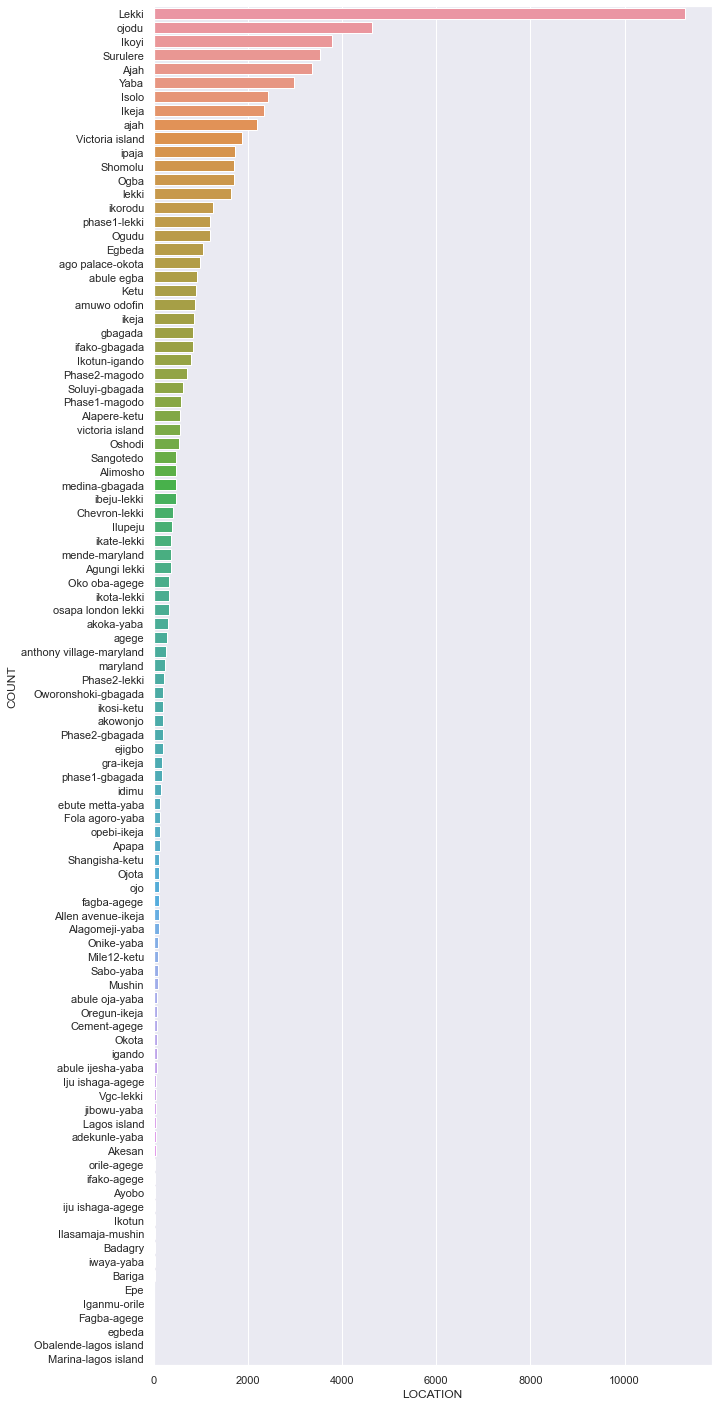

In [17]:
plot_count(df,'LOCATION') #before fixing the location column

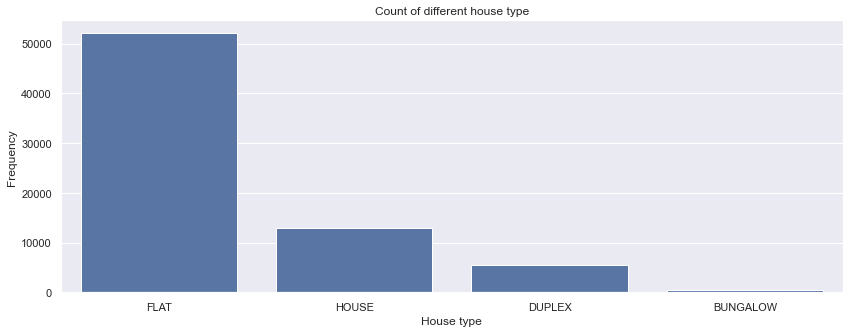

In [18]:
sns.set()
fig,ax = plt.subplots(figsize = (14,5))
location_fr = df['HOUSE_TYPE'].value_counts()
ord_frq = location_fr.index
sns.countplot(x = 'HOUSE_TYPE',data=df,color = sns.color_palette()[0],order = ord_frq)
#plt.ylim([0,50000])
plt.xlabel('House type')
plt.ylabel('Frequency')
plt.title('Count of different house type');

In [19]:
df['HOUSE_TYPE'].value_counts()

FLAT        52044
HOUSE       12914
DUPLEX       5468
BUNGALOW      424
Name: HOUSE_TYPE, dtype: int64

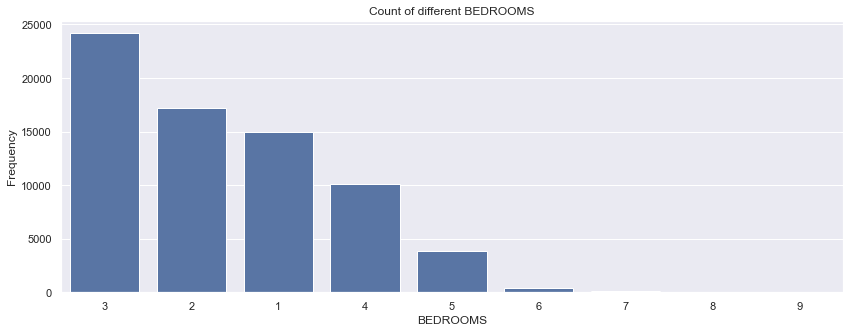

In [20]:
sns.set()
fig,ax = plt.subplots(figsize = (14,5))
location_fr = df['BEDROOMS'].value_counts()
ord_frq = location_fr.index
sns.countplot(x = 'BEDROOMS',data=df,color = sns.color_palette()[0],order = ord_frq)
#plt.ylim([0,50000])
plt.xlabel('BEDROOMS')
plt.ylabel('Frequency')
plt.title('Count of different BEDROOMS');

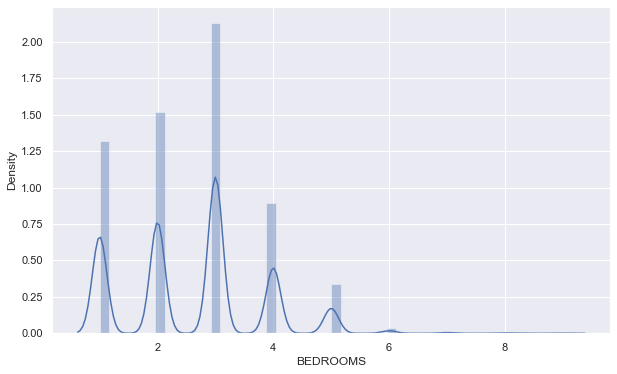

In [21]:
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(df['BEDROOMS']);

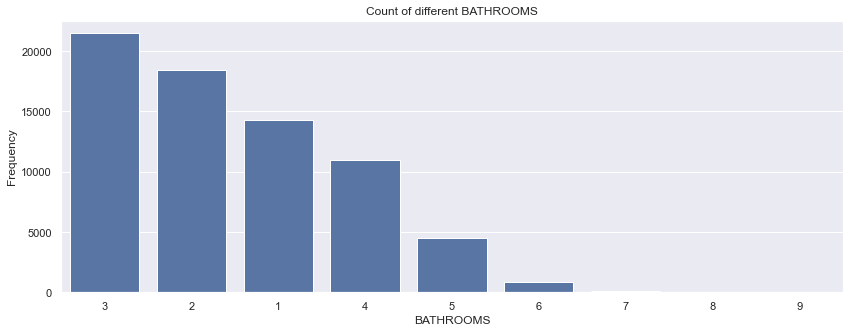

In [22]:
sns.set()
fig,ax = plt.subplots(figsize = (14,5))
location_fr = df['BATHROOMS'].value_counts()
ord_frq = location_fr.index
sns.countplot(x = 'BATHROOMS',data=df,color = sns.color_palette()[0],order = ord_frq)
#plt.ylim([0,50000])
plt.xlabel('BATHROOMS')
plt.ylabel('Frequency')
plt.title('Count of different BATHROOMS');

In [23]:
df['PRICE'].describe()

count    7.085000e+04
mean     2.324633e+06
std      2.978261e+06
min      1.000000e+05
25%      6.000000e+05
50%      1.200000e+06
75%      3.000000e+06
max      2.000000e+07
Name: PRICE, dtype: float64

2.8003137280895807


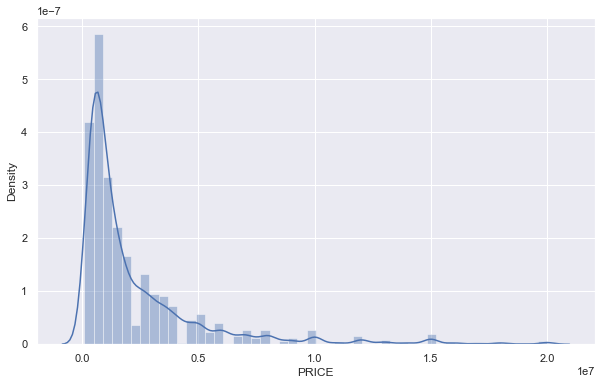

In [24]:
#as we can see price is very positively skewed
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(df['PRICE'])
print(df['PRICE'].skew()) #price is very positively skewed

2.8003137280895807


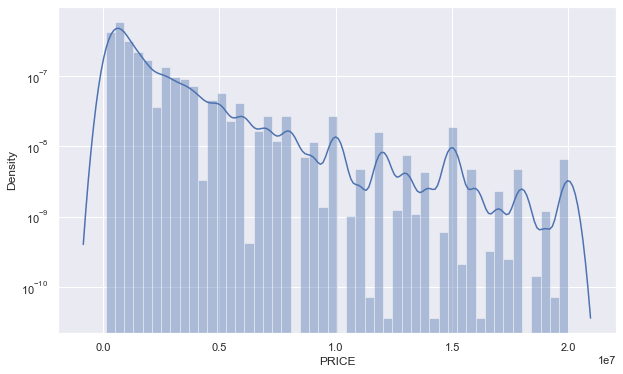

In [25]:
#as we can see price is very positively skewed after taking the logarithm of the price
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(df['PRICE'])
plt.yscale('log')
print(df['PRICE'].skew()) #price is very positively skewed

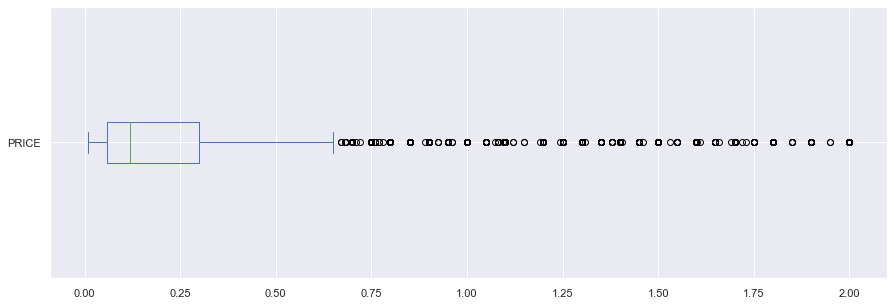

In [26]:
#check for outliers
fig,ax = plt.subplots(figsize = (15,5))
(df['PRICE'] / 1e7).plot(kind = 'box',vert = False); #there are no outliers there so we can do a time series analysis

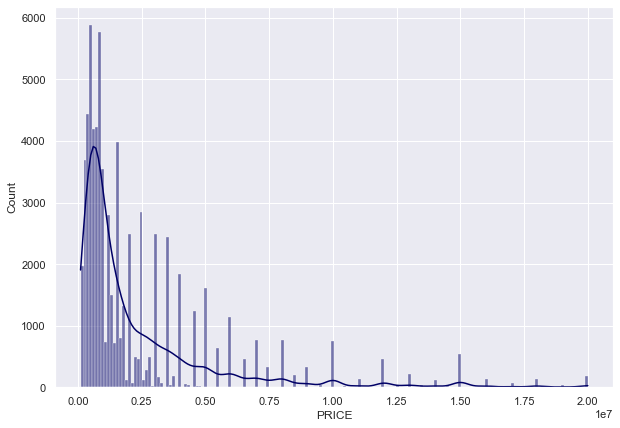

In [27]:
sns.set()
plt.figure(figsize=[10, 7])
sns.histplot(df_copy['PRICE'],kde = True,color="#000066")
plt.show()

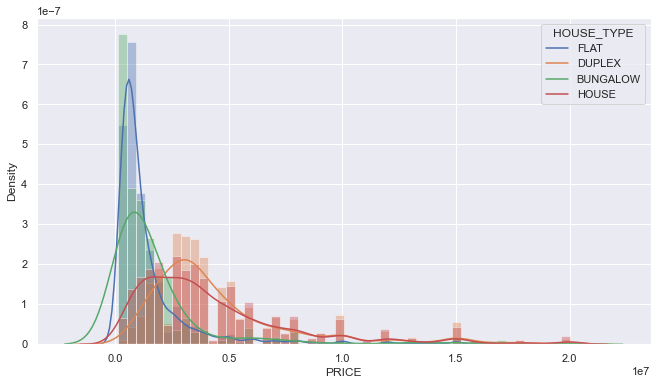

In [28]:
sns.set_style('darkgrid')
plt.subplots(figsize = (11,6))
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'FLAT']['PRICE'],kde_kws = {'label':'FLAT'})
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'DUPLEX']['PRICE'],kde_kws = {'label':'DUPLEX'})
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'BUNGALOW']['PRICE'],kde_kws = {'label':'BUNGALOW'})
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'HOUSE']['PRICE'],kde_kws = {'label':'HOUSE'})
# sns.distplot(df_copy[df['HOUSE_TYPE'] == 'DUPLEX WT BQ']['PRICE'],kde_kws = {'label':'DUPLEX WT BQ'})
plt.legend(title = 'HOUSE_TYPE')
plt.show()

In [29]:
def plot_frq(df,col):
    fig,ax =plt.subplots(figsize = (11,6))
    sns.regplot(data = df,x = col,y = 'PRICE')
    plt.xlabel(str(col))
    plt.ylabel('PRICE')
    plt.show()

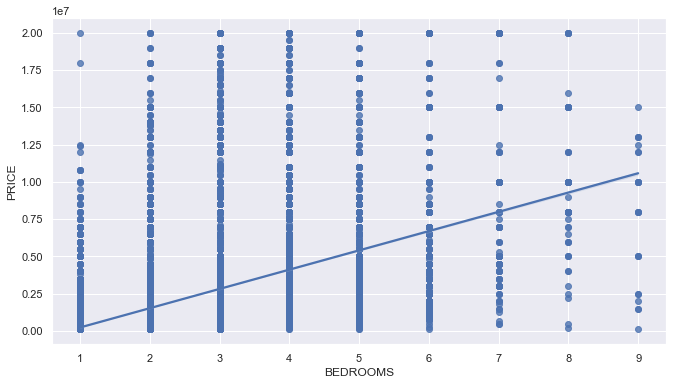

In [30]:
plot_frq(df_copy,'BEDROOMS')

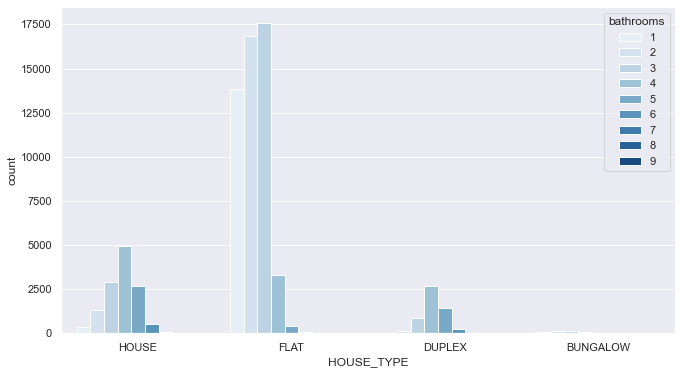

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize = (11,6))
sns.countplot(data=df_copy,x = 'HOUSE_TYPE',hue = 'BATHROOMS',palette = 'Blues')
plt.legend(loc = 'upper right',title = 'bathrooms')
plt.show()

<Figure size 1440x720 with 0 Axes>

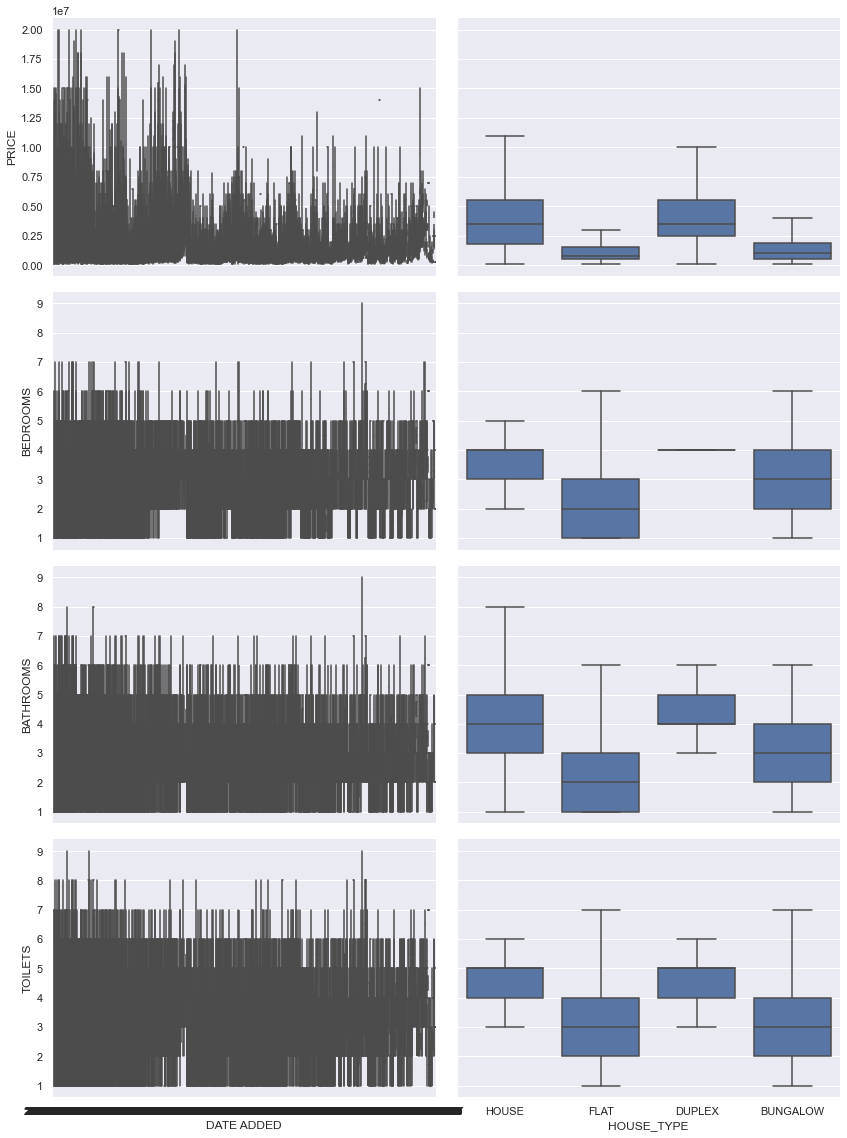

In [32]:
num_v = [col for col in df_copy.select_dtypes('number')]
cate_v = [col for col in df_copy.select_dtypes('O')if not col == 'LOCATION']
plt.figure(figsize = (20,10))
g  = sns.PairGrid(data=df_copy,x_vars=cate_v,y_vars=num_v,aspect = 1.5,size = 4)
g.map(sns.boxplot,color = sns.color_palette()[0],showfliers = False)
plt.show()

In [33]:
#checking the mean of location and house type to price
g_df = df_copy.groupby(['LOCATION','HOUSE_TYPE','BEDROOMS'])['PRICE'].mean().reset_index()
print_full(df_copy.groupby(['LOCATION','HOUSE_TYPE','BEDROOMS'])['PRICE'].max().reset_index())

                      LOCATION HOUSE_TYPE  BEDROOMS                PRICE
0                 Agungi lekki     DUPLEX         3         2,500,000.00
1                 Agungi lekki     DUPLEX         4         4,000,000.00
2                 Agungi lekki     DUPLEX         5         4,000,000.00
3                 Agungi lekki       FLAT         1         1,500,000.00
4                 Agungi lekki       FLAT         2         5,000,000.00
5                 Agungi lekki       FLAT         3         3,000,000.00
6                 Agungi lekki       FLAT         4         3,200,000.00
7                 Agungi lekki       FLAT         5         3,000,000.00
8                 Agungi lekki       FLAT         6         3,000,000.00
9                 Agungi lekki      HOUSE         3         2,500,000.00
10                Agungi lekki      HOUSE         4         4,200,000.00
11                Agungi lekki      HOUSE         5         5,500,000.00
12                Agungi lekki      HOUSE         6

<AxesSubplot:>

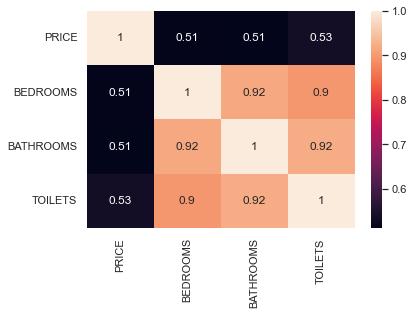

In [34]:
# check for correlations between the features
sns.heatmap(df_copy.corr(), annot = True)

<Figure size 576x432 with 0 Axes>

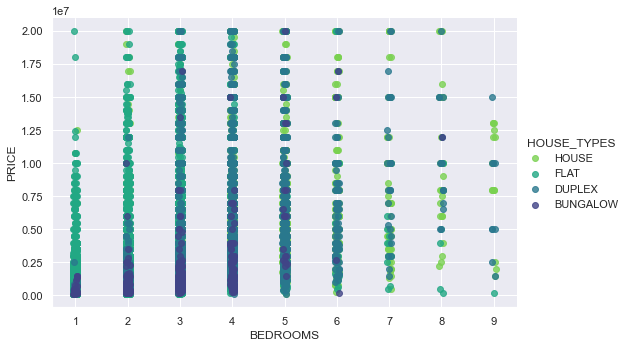

In [35]:
plt.figure(figsize = (8,6))
g = sns.FacetGrid(data=df_copy,hue = 'HOUSE_TYPE',size = 5,aspect = 1.5,palette='viridis_r')
g.map(sns.regplot,'BEDROOMS','PRICE',x_jitter = 0.04,fit_reg = False)
g.add_legend(title = 'HOUSE_TYPES')
plt.show()